In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os

data_path = "/content/gdrive/MyDrive/Kaggle"
os.environ['KAGGLE_CONFIG_DIR'] = data_path

In [3]:
%cd /content/gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


In [5]:
import pandas as pd 
import numpy as np
missing_value=["Undefined"]
data = pd.read_csv("heart_failure_clinical_records_dataset.csv", na_values=missing_value) 
data.head()

np.sum(data.isnull())

# Here we are using the 12 features to predict the liklihood of a death event. 

Y = data['DEATH_EVENT']
Y = Y[1:]
X = data.drop(['DEATH_EVENT'], axis=1)
X = X[1:]

print(X.shape, Y.shape)


(298, 12) (298,)


In [6]:
from collections import Counter

original_counts = Counter(Y)
print(original_counts)


# now lets balance the data
from imblearn.over_sampling import SMOTE
over = SMOTE()
X_new, Y_new = over.fit_resample(X,Y)
new_counts = Counter(Y_new)
print(new_counts)

Counter({0: 203, 1: 95})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Counter({1: 203, 0: 203})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization with out the use of SMOTE.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=0)

pca = PCA()

logistic = LogisticRegression(max_iter=100000, tol=0.1)

pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# This grid search is exhaustive and time consuming. 

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [2, 4, 8, 10, 12],
    'logistic__C': np.logspace(-4, 4, 6),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(x_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.815):
{'logistic__C': 6.309573444801943, 'pca__n_components': 8}


In [8]:

print(search.best_params_)

{'logistic__C': 6.309573444801943, 'pca__n_components': 8}


In [9]:
search.best_params_
np.logspace(-4,4,6)


array([1.00000000e-04, 3.98107171e-03, 1.58489319e-01, 6.30957344e+00,
       2.51188643e+02, 1.00000000e+04])

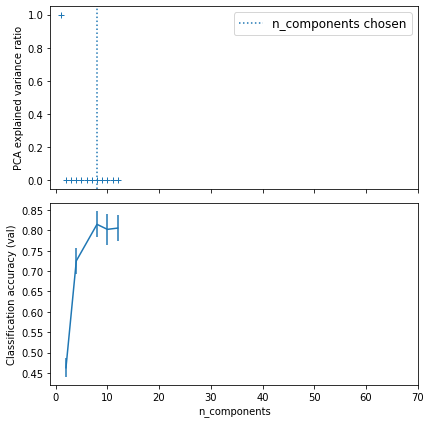

In [10]:
pca.fit(x_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np


#new = np.array([53, 0 , 63, 1, 60, 0, 368000, 0.8, 135, 1, 0 ,22])
#new = new.reshape(1,-1)
x_train, x_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=0)

pca = PCA(n_components=8)
stdscl = StandardScaler()
logistic = LogisticRegression(C = 0.15848931924611143, max_iter=100000, tol=0.1)

logistic = logistic.fit(x_train, y_train)
from joblib import dump, load 
dump(logistic, 'heartfailure.pkl')

def my_prediction(array):
  prediction = logistic.predict(array)
  return prediction
#y_prediction = logistic.predict(x_test)
#print(my_prediction)